In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

Load dữ liệu

In [ ]:
raw_data = pd.read_csv('/content/heart2.csv')

In [ ]:
# number of rows and columns in the dataset
raw_data.shape

(918, 12)

In [ ]:
raw_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,0


In [ ]:
raw_data.describe()

,age,trestbps,chol,fbs,thalach,oldpeak,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.446623
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
X_save = raw_data.drop(columns=['target'])

**TIỀN XỬ LÝ DỮ LIỆU**

In [ ]:
# Các cột mà dữ liệu của nó không thực sự là số (biến phân loại) --> one-hot encoding

columns_to_get_dummies = ['sex', 'cp', 'restecg', 'exang', 'slope']
data = pd.get_dummies(raw_data, columns=columns_to_get_dummies) # one-hot encoding

# Chuẩn hóa các cột có dữ liệu là biến liên tục
standardScaler         = StandardScaler()
columns_to_scale       = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

Ma trận tương quan giữa các biến liên tục và target

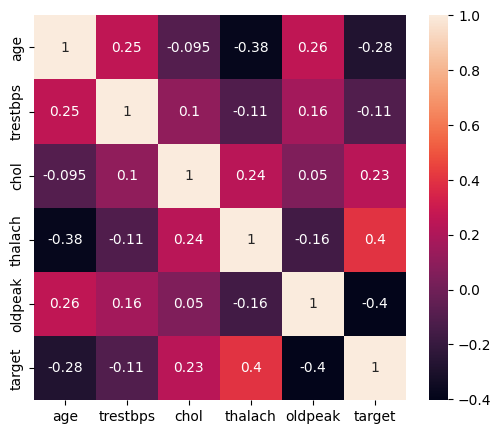

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(data[["age", "trestbps", "chol", "thalach", "oldpeak", "target"]].corr(), annot = True)
plt.show()

**Tách Futures với Target**

In [ ]:
X = data.drop(columns='target', axis=1)
Y = data['target']

In [ ]:
print(X)

          age  trestbps      chol  fbs   thalach   oldpeak  sex_F  sex_M  \
0   -1.433140  0.410909  0.825070    0  1.382928 -0.832432      0      1   
1   -0.478484  1.491752 -0.171961    0  0.754157  0.105664      1      0   
2   -1.751359 -0.129513  0.770188    0 -1.525138 -0.832432      0      1   
3   -0.584556  0.302825  0.139040    0 -1.132156  0.574711      1      0   
4    0.051881  0.951331 -0.034755    0 -0.581981 -0.832432      0      1   
..        ...       ...       ...  ...       ...       ...    ...    ...   
913 -0.902775 -1.210356  0.596393    0 -0.188999  0.293283      0      1   
914  1.536902  0.627078 -0.053049    1  0.164684  2.357094      0      1   
915  0.370100 -0.129513 -0.620168    0 -0.857069  0.293283      0      1   
916  0.370100 -0.129513  0.340275    0  1.461525 -0.832432      1      0   
917 -1.645286  0.302825 -0.217696    0  1.422226 -0.832432      0      1   

     cp_ASY  cp_ATA  cp_NAP  cp_TA  restecg_LVH  restecg_Normal  restecg_ST  \
0       

In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
913    0
914    0
915    0
916    0
917    1
Name: target, Length: 918, dtype: int64


Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, y_train.shape, y_test.shape)

(918, 20) (734, 20) (184, 20)
(918,) (734,) (184,)


**Model Training**

**SVM tuyến tính**

Không dùng alpha thay vào đó là w
Nhưng sau thì thấy giống LR hơn

In [ ]:
def cross_entropy_loss(y, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

In [ ]:
#THuật toán gốc
def train_svm(X, y):
    n_samples, n_features = X.shape
    max_iters = 1000
    tolerance = 1e-6
    learning_rate = 0.1

    # Khởi tạo vector trọng số w và bias b
    w = np.zeros(n_features)
    b = 0.0

    # Vòng lặp huấn luyện
    for epoch in range(max_iters):

        y_pred = np.dot(X, w) + b
        y_pred = 1 / (1 + np.exp(-y_pred))

        loss = cross_entropy_loss(y, y_pred)

        if loss < tolerance:
            print(f'Epoch {epoch + 1}/{max_iters} - Loss: {loss:.4f}')
            break

        # Tính gradient theo toàn bộ tập dữ liệu
        gradient_w = np.dot(X.T, y_pred - y) / n_samples
        gradient_b = np.mean(y_pred - y)

        # Cập nhật trọng số và bias theo Full Gradient Descent
        w -= learning_rate * gradient_w
        b -= learning_rate * gradient_b

        # Ghi thông tin vào log
        if ((epoch + 1) % 10 == 0):
            print(f'Epoch {epoch + 1}/{max_iters} - Loss: {loss:.6f}')

    return w, b

In [ ]:
def predict_svm(X_test, X_train, w, b, gamma=0.1):
    n_test = X_test.shape[0]
    y_pred = np.zeros(n_test)

    for i in range(n_test):
        prediction = 0
        for j in range(X_train.shape[0]):
            squared_distance = np.sum((X_train[j] - X_test[i]) ** 2)
            prediction += w[j] * np.exp(-gamma * squared_distance)

        prediction += b
        y_pred[i] = prediction

    y_pred = 1 / (1 + np.exp(-y_pred))
    y_pred_class = np.where(y_pred >= 0.5, 1, 0)
    return y_pred_class

In [ ]:
def rbf_kernel(X, gamma=1.0):
    """
    Chuyển dữ liệu X sang không gian gần tuyến tính bằng kernel RBF (Radial Basis Function)
    Returns:
    - K: Ma trận kernel sau khi áp dụng RBF [n_samples, n_samples].
    """

    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))

    for i in range(n_samples):
        for j in range(n_samples):
            # Tính bình phương khoảng cách Euclidean giữa X[i] và X[j]
            squared_distance = np.sum((X[i] - X[j]) ** 2)
            # Áp dụng hàm RBF kernel
            K[i, j] = np.exp(-gamma * squared_distance)

    return K

# Sử dụng hàm rbf_kernel để chuyển đổi dữ liệu X_train
X_rbf = rbf_kernel(X_train.values, gamma=0.1)

In [ ]:
w,b = train_svm(X_rbf, y_train)

Epoch 10/1000 - Loss: 0.440104
Epoch 20/1000 - Loss: 0.399864
Epoch 30/1000 - Loss: 0.384915
Epoch 40/1000 - Loss: 0.376143
Epoch 50/1000 - Loss: 0.369851
Epoch 60/1000 - Loss: 0.364895
Epoch 70/1000 - Loss: 0.360795
Epoch 80/1000 - Loss: 0.357303
Epoch 90/1000 - Loss: 0.354266
Epoch 100/1000 - Loss: 0.351583
Epoch 110/1000 - Loss: 0.349183
Epoch 120/1000 - Loss: 0.347012
Epoch 130/1000 - Loss: 0.345032
Epoch 140/1000 - Loss: 0.343212
Epoch 150/1000 - Loss: 0.341528
Epoch 160/1000 - Loss: 0.339962
Epoch 170/1000 - Loss: 0.338499
Epoch 180/1000 - Loss: 0.337127
Epoch 190/1000 - Loss: 0.335835
Epoch 200/1000 - Loss: 0.334615
Epoch 210/1000 - Loss: 0.333461
Epoch 220/1000 - Loss: 0.332366
Epoch 230/1000 - Loss: 0.331325
Epoch 240/1000 - Loss: 0.330334
Epoch 250/1000 - Loss: 0.329388
Epoch 260/1000 - Loss: 0.328485
Epoch 270/1000 - Loss: 0.327621
Epoch 280/1000 - Loss: 0.326793
Epoch 290/1000 - Loss: 0.325999
Epoch 300/1000 - Loss: 0.325238
Epoch 310/1000 - Loss: 0.324505
Epoch 320/1000 - 

In [ ]:
#Lưu mô hình
import h5py

In [ ]:
def save_svm_model(w, b, gamma, filepath='svm_model.h5'):
    with h5py.File(filepath, 'w') as file:
        file.create_dataset('w', data=w)
        file.create_dataset('b', data=b)
        file.create_dataset('gamma', data=gamma)

In [ ]:
save_svm_model(w, b, gamma=0.1, filepath='heart_model.h5')

In [ ]:
def load_model(filepath):
    with h5py.File(filepath, 'r') as file:
        w = file['w'][:]
        b = file['b'][()]
        gamma = file['gamma'][()]
    return w, b, gamma

In [ ]:
w, b, gamma = load_model('heart_model.h5')

In [ ]:
# Test
y_pred = predict_svm(X_test.values, X_train.values, w, b, gamma=0.1)
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác:", accuracy)

Độ chính xác: 0.8532608695652174


In [ ]:
def accuracy_per_class(y_true, y_pred):
    unique_classes = np.unique(y_true)
    class_accuracies = {}

    for cls in unique_classes:
        true_mask = (y_true == cls)
        pred_mask = (y_pred == cls)
        correct_predictions = np.sum(true_mask & pred_mask)
        total_samples = np.sum(true_mask)
        accuracy = correct_predictions / total_samples if total_samples > 0 else 0.0
        class_accuracies[cls] = accuracy

    return class_accuracies
accuracies = accuracy_per_class(y_test, y_pred)
for cls, acc in accuracies.items():
    print(f"Accuracy for class {cls}: {acc:.2f}")

# Tính tổng độ chính xác bằng cách tích các độ chính xác của từng lớp
total_accuracy = np.prod(list(accuracies.values()))
print(f"Total Accuracy: {total_accuracy:.2f}")

Accuracy for class 0: 0.87
Accuracy for class 1: 0.83
Total Accuracy: 0.72


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

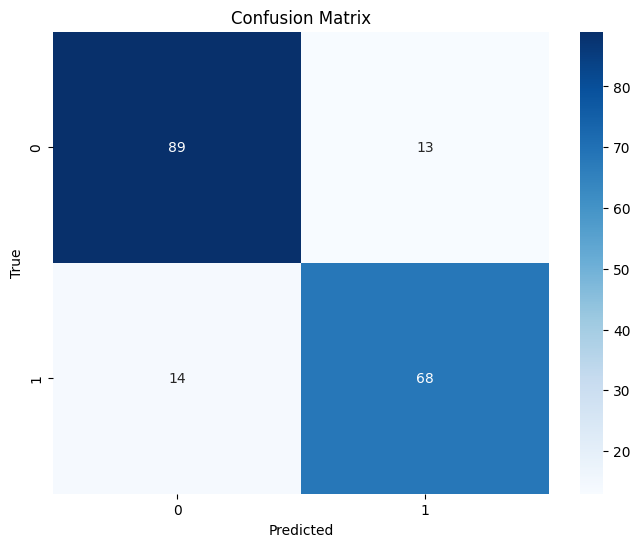

In [ ]:
# Tính ma trận nhầm lẫn
confusion = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
class_names = np.unique(y_test)
df_confusion = pd.DataFrame(confusion, index=class_names, columns=class_names)
plt.figure(figsize=(8, 6))
sns.heatmap(df_confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

**Test 1 mẫu**

Đọc mẫu và xử lý

In [ ]:
def XuLyMau(new_data, standardScaler, columns_to_scale, columns_to_get_dummies):
    # Tạo DataFrame từ dữ liệu mới
    df = pd.DataFrame([new_data], columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope'])

    # One-hot encoding cho các cột cần thiết
    df_encoded = pd.get_dummies(df, columns=columns_to_get_dummies)

    # Chuẩn hóa các cột liên tục
    df_encoded[columns_to_scale] = standardScaler.transform(df_encoded[columns_to_scale])

    return df_encoded

In [ ]:
#ví dụ
sample_input = [40, 'M', 'ATA', 140, 289, 0, 'Normal', 172, 'N', 0.0, 'Up']

In [ ]:
df_sample = pd.DataFrame([sample_input],
                        columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope'])

In [ ]:
df_sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up


In [ ]:
X_mix_data = pd.concat([X_save, df_sample], ignore_index=True)
# One-hot encoding và chuẩn hóa
columns_to_get_dummies = ['sex', 'cp', 'restecg', 'exang', 'slope']
X_mix_data_encoded = pd.get_dummies(X_mix_data, columns=columns_to_get_dummies)

standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_mix_data_encoded[columns_to_scale] = standardScaler.fit_transform(X_mix_data_encoded[columns_to_scale])

# Lấy ra mẫu đã được chuẩn hóa
new_data_index = X_mix_data_encoded.shape[0] - 1
processed_sample = pd.DataFrame(X_mix_data_encoded.iloc[new_data_index]).transpose()

In [ ]:
print(processed_sample)

          age  trestbps      chol  fbs  thalach   oldpeak  sex_F  sex_M  \
918 -1.430762  0.410648  0.824316  0.0  1.38074 -0.831666    0.0    1.0   

     cp_ASY  cp_ATA  cp_NAP  cp_TA  restecg_LVH  restecg_Normal  restecg_ST  \
918     0.0     1.0     0.0    0.0          0.0             1.0         0.0   

     exang_N  exang_Y  slope_Down  slope_Flat  slope_Up  
918      1.0      0.0         0.0         0.0       1.0  


In [ ]:
label_output = predict_svm(processed_sample.values, X_train.values, w, b, gamma=0.1)[0]

In [ ]:
label_output

1